In [880]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [881]:
import warnings
warnings.filterwarnings('ignore')

### Part 1) Data Reading and Cleaning

In [882]:
loan_data = pd.read_csv('loan.csv')
loan_data.head(10)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   
5  1075269    1311441       5000         5000           5000.0   36 months   
6  1069639    1304742       7000         7000           7000.0   60 months   
7  1072053    1288686       3000         3000           3000.0   36 months   
8  1071795    1306957       5600         5600           5600.0   60 months   
9  1071570    1306721       5375         5375           5350.0   60 months   

  int_rate  installment grade sub_grade            ...              \
0   10.65%       162.87     B        B2            ...               
1   15.27%        59.83     C        C4            ...               
2   15.96%        84.33     C        C5            ...               
3   13.49%       339.31     C        C1            ...               
4   12.69%        67.79     B        B5            ...               
5    7.90%       156.46     A        A4            ...               
6   15.96%       170.08     C        C5            ...               
7   18.64%       109.43     E        E1            ...               
8   21.28%       152.39     F        F2            ...               
9   12.69%       121.45     B        B5            ...               

  num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
0                NaN                NaN            NaN               NaN   
1                NaN                NaN            NaN               NaN   
2                NaN                NaN            NaN               NaN   
3                NaN                NaN            NaN               NaN   
4                NaN                NaN            NaN               NaN   
5                NaN                NaN            NaN               NaN   
6                NaN                NaN            NaN               NaN   
7                NaN                NaN            NaN               NaN   
8                NaN                NaN            NaN               NaN   
9                NaN                NaN            NaN               NaN   

  pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort  \
0                  0.0       0.0             NaN               NaN   
1                  0.0       0.0             NaN               NaN   
2                  0.0       0.0             NaN               NaN   
3                  0.0       0.0             NaN               NaN   
4                  0.0       0.0             NaN               NaN   
5                  0.0       0.0             NaN               NaN   
6                  0.0       0.0             NaN               NaN   
7                  0.0       0.0             NaN               NaN   
8                  0.0       0.0             NaN               NaN   
9                  0.0       0.0             NaN               NaN   

  total_bc_limit total_il_high_credit_limit  
0            NaN                        NaN  
1            NaN                        NaN  
2            NaN                        NaN  
3            NaN                        NaN  
4            NaN                        NaN  
5            NaN                        NaN  
6            NaN                        NaN  
7            NaN                        NaN  
8            NaN                        NaN  
9            NaN                        NaN  

[10 rows x 111 columns]

In [883]:
#checking for duplicates in Loan id

loan_data.duplicated(subset="id").sum()

0

In [884]:
# checking for null data across all columns

loan_data.isnull().sum()/len(loan_data.index)*100

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

In [885]:
# Dropping all Columns with 100% NA values
loan_data_final = loan_data.dropna(axis=1, how ='all')
loan_data_final

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000       4975.00000   
1      1077430    1314167       2500         2500       2500.00000   
2      1077175    1313524       2400         2400       2400.00000   
3      1076863    1277178      10000        10000      10000.00000   
4      1075358    1311748       3000         3000       3000.00000   
5      1075269    1311441       5000         5000       5000.00000   
6      1069639    1304742       7000         7000       7000.00000   
7      1072053    1288686       3000         3000       3000.00000   
8      1071795    1306957       5600         5600       5600.00000   
9      1071570    1306721       5375         5375       5350.00000   
10     1070078    1305201       6500         6500       6500.00000   
11     1069908    1305008      12000        12000      12000.00000   
12     1064687    1298717       9000         9000       9000.00000   
13     1069866    1304956       3000         3000       3000.00000   
14     1069057    1303503      10000        10000      10000.00000   
15     1069759    1304871       1000         1000       1000.00000   
16     1065775    1299699      10000        10000      10000.00000   
17     1069971    1304884       3600         3600       3600.00000   
18     1062474    1294539       6000         6000       6000.00000   
19     1069742    1304855       9200         9200       9200.00000   
20     1069740    1284848      20250        20250      19142.16108   
21     1039153    1269083      21000        21000      21000.00000   
22     1069710    1304821      10000        10000      10000.00000   
23     1069700    1304810      10000        10000      10000.00000   
24     1069559    1304634       6000         6000       6000.00000   
25     1069697    1273773      15000        15000      15000.00000   
26     1069800    1304679      15000        15000       8725.00000   
27     1069657    1304764       5000         5000       5000.00000   
28     1069799    1304678       4000         4000       4000.00000   
29     1047704    1278806       8500         8500       8500.00000   
...        ...        ...        ...          ...              ...   
39687   111307     105982      12000        12000       2500.00000   
39688   111227     111223      20000        20000       2800.00000   
39689   109355     109346       1200         1200          0.00000   
39690   107136     107130      12250        12250       1525.00000   
39691   106360     106333       2700         2700        550.00000   
39692    76597      76583       5000         5000       1775.00000   
39693   106079     106039       3500         3500       1200.00000   
39694    90966      90962       5000         5000       4150.00000   
39695    92440      92423       5000         5000       3100.00000   
39696   102376      95212      25000        25000        525.00000   
39697   101579     100083      10000        10000        400.00000   
39698    98982      98957       5000         5000        675.00000   
39699    98339      97572       5100         5100        575.00000   
39700    98276      98268       5400         5400        200.00000   
39701    96844      95222       5300         5300        600.00000   
39702    96350      96338       5000         5000        850.00000   
39703    94838      73673       3000         3000       2550.00000   
39704    93277      93254       3000         3000        950.00000   
39705    93061      93057       5000         5000        250.00000   
39706    92676      92671       5000         5000        150.00000   
39707    92666      92661       5000         5000        525.00000   
39708    92552      92542       5000         5000        375.00000   
39709    92533      92529       5000         5000        675.00000   
39710    92507      92502       5000         5000        250.00000   
39711    92402      92390       5000         5000        700.00000   
39712    92187      92

In [886]:
#Checking NA % for remaining columns
loan_data_final.isnull().sum()/len(loan_data.index)*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [887]:
# Checking rows with all null values
loan_data_final[loan_data_final.isnull().sum(axis=1) == 57]

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, policy_code, application_type, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, pub_rec_bankruptcies, tax_liens]
Index: []

[0 rows x 57 columns]

In [888]:
loan_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

### Part 2) Data Understanding and Preparation

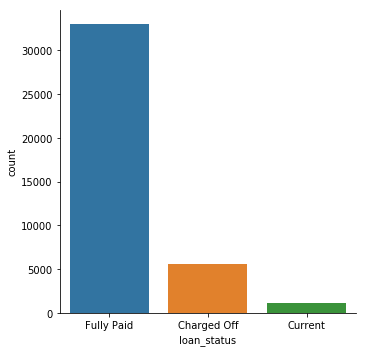

In [889]:
# Understanding distribution of loan status
sns.factorplot(x = "loan_status", data = loan_data_final, kind = "count")

In [890]:
loan_data_final['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [891]:
# Understanding % contribution of different loan status
loan_data_final.groupby('loan_status')['loan_status'].aggregate('count')/loan_data_final['loan_status'].aggregate('count')*100

loan_status
Charged Off    14.167737
Current         2.870307
Fully Paid     82.961956
Name: loan_status, dtype: float64

In [892]:
#Understanding spread of loan amount across all applications
loan_data_final['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [893]:
#Understanding income data across all applications in $'000
loan_data_final['annual_inc'].describe()/1000

count      39.717000
mean       68.968926
std        63.793766
min         4.000000
25%        40.404000
50%        59.000000
75%        82.300000
max      6000.000000
Name: annual_inc, dtype: float64

In [894]:
#Understanding dti (debt service capability or debt to income ratio across all applications)
loan_data_final['dti'].describe()

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

In [895]:
#Understanding interest rates across all applications
loan_data_final['int_rate'] = loan_data_final['int_rate'].str.strip('%').astype('float')
loan_data_final['int_rate'].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [896]:
#Classifying annual income as follows: <25,000, 25000-50000, 50000-75000,75000-100000, & >100000
loan_data_final['income_bracket'] = loan_data_final['annual_inc'].apply(lambda x: '<= 25,000' if x <= 25000 else ('25,001-50,000' if x <=50000 else ('50,001-75,000' if x<=75000 else('75,001-100,000' if x <=100000 else '>100,000'))))
loan_data_final

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000       4975.00000   
1      1077430    1314167       2500         2500       2500.00000   
2      1077175    1313524       2400         2400       2400.00000   
3      1076863    1277178      10000        10000      10000.00000   
4      1075358    1311748       3000         3000       3000.00000   
5      1075269    1311441       5000         5000       5000.00000   
6      1069639    1304742       7000         7000       7000.00000   
7      1072053    1288686       3000         3000       3000.00000   
8      1071795    1306957       5600         5600       5600.00000   
9      1071570    1306721       5375         5375       5350.00000   
10     1070078    1305201       6500         6500       6500.00000   
11     1069908    1305008      12000        12000      12000.00000   
12     1064687    1298717       9000         9000       9000.00000   
13     1069866    1304956       3000         3000       3000.00000   
14     1069057    1303503      10000        10000      10000.00000   
15     1069759    1304871       1000         1000       1000.00000   
16     1065775    1299699      10000        10000      10000.00000   
17     1069971    1304884       3600         3600       3600.00000   
18     1062474    1294539       6000         6000       6000.00000   
19     1069742    1304855       9200         9200       9200.00000   
20     1069740    1284848      20250        20250      19142.16108   
21     1039153    1269083      21000        21000      21000.00000   
22     1069710    1304821      10000        10000      10000.00000   
23     1069700    1304810      10000        10000      10000.00000   
24     1069559    1304634       6000         6000       6000.00000   
25     1069697    1273773      15000        15000      15000.00000   
26     1069800    1304679      15000        15000       8725.00000   
27     1069657    1304764       5000         5000       5000.00000   
28     1069799    1304678       4000         4000       4000.00000   
29     1047704    1278806       8500         8500       8500.00000   
...        ...        ...        ...          ...              ...   
39687   111307     105982      12000        12000       2500.00000   
39688   111227     111223      20000        20000       2800.00000   
39689   109355     109346       1200         1200          0.00000   
39690   107136     107130      12250        12250       1525.00000   
39691   106360     106333       2700         2700        550.00000   
39692    76597      76583       5000         5000       1775.00000   
39693   106079     106039       3500         3500       1200.00000   
39694    90966      90962       5000         5000       4150.00000   
39695    92440      92423       5000         5000       3100.00000   
39696   102376      95212      25000        25000        525.00000   
39697   101579     100083      10000        10000        400.00000   
39698    98982      98957       5000         5000        675.00000   
39699    98339      97572       5100         5100        575.00000   
39700    98276      98268       5400         5400        200.00000   
39701    96844      95222       5300         5300        600.00000   
39702    96350      96338       5000         5000        850.00000   
39703    94838      73673       3000         3000       2550.00000   
39704    93277      93254       3000         3000        950.00000   
39705    93061      93057       5000         5000        250.00000   
39706    92676      92671       5000         5000        150.00000   
39707    92666      92661       5000         5000        525.00000   
39708    92552      92542       5000         5000        375.00000   
39709    92533      92529       5000         5000        675.00000   
39710    92507      92502       5000         5000        250.00000   
39711    92402      92390       5000         5000        700.00000   
39712    92187      92

In [897]:
#Classifying loan amount as follows: <5000, 5,000-10000, 10000-20000, 20000-30000 & >30000
loan_data_final['loan_amt_bracket'] = loan_data_final['loan_amnt'].apply(lambda x: '<=5000'if x <=5000 else('5001-10,000' if x <= 10000 else ('10,001-20,000' if x <=20000 else ('20,001-30,000' if x<=30000 else '>30,000'))))
loan_data_final

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000       4975.00000   
1      1077430    1314167       2500         2500       2500.00000   
2      1077175    1313524       2400         2400       2400.00000   
3      1076863    1277178      10000        10000      10000.00000   
4      1075358    1311748       3000         3000       3000.00000   
5      1075269    1311441       5000         5000       5000.00000   
6      1069639    1304742       7000         7000       7000.00000   
7      1072053    1288686       3000         3000       3000.00000   
8      1071795    1306957       5600         5600       5600.00000   
9      1071570    1306721       5375         5375       5350.00000   
10     1070078    1305201       6500         6500       6500.00000   
11     1069908    1305008      12000        12000      12000.00000   
12     1064687    1298717       9000         9000       9000.00000   
13     1069866    1304956       3000         3000       3000.00000   
14     1069057    1303503      10000        10000      10000.00000   
15     1069759    1304871       1000         1000       1000.00000   
16     1065775    1299699      10000        10000      10000.00000   
17     1069971    1304884       3600         3600       3600.00000   
18     1062474    1294539       6000         6000       6000.00000   
19     1069742    1304855       9200         9200       9200.00000   
20     1069740    1284848      20250        20250      19142.16108   
21     1039153    1269083      21000        21000      21000.00000   
22     1069710    1304821      10000        10000      10000.00000   
23     1069700    1304810      10000        10000      10000.00000   
24     1069559    1304634       6000         6000       6000.00000   
25     1069697    1273773      15000        15000      15000.00000   
26     1069800    1304679      15000        15000       8725.00000   
27     1069657    1304764       5000         5000       5000.00000   
28     1069799    1304678       4000         4000       4000.00000   
29     1047704    1278806       8500         8500       8500.00000   
...        ...        ...        ...          ...              ...   
39687   111307     105982      12000        12000       2500.00000   
39688   111227     111223      20000        20000       2800.00000   
39689   109355     109346       1200         1200          0.00000   
39690   107136     107130      12250        12250       1525.00000   
39691   106360     106333       2700         2700        550.00000   
39692    76597      76583       5000         5000       1775.00000   
39693   106079     106039       3500         3500       1200.00000   
39694    90966      90962       5000         5000       4150.00000   
39695    92440      92423       5000         5000       3100.00000   
39696   102376      95212      25000        25000        525.00000   
39697   101579     100083      10000        10000        400.00000   
39698    98982      98957       5000         5000        675.00000   
39699    98339      97572       5100         5100        575.00000   
39700    98276      98268       5400         5400        200.00000   
39701    96844      95222       5300         5300        600.00000   
39702    96350      96338       5000         5000        850.00000   
39703    94838      73673       3000         3000       2550.00000   
39704    93277      93254       3000         3000        950.00000   
39705    93061      93057       5000         5000        250.00000   
39706    92676      92671       5000         5000        150.00000   
39707    92666      92661       5000         5000        525.00000   
39708    92552      92542       5000         5000        375.00000   
39709    92533      92529       5000         5000        675.00000   
39710    92507      92502       5000         5000        250.00000   
39711    92402      92390       5000         5000        700.00000   
39712    92187      92

In [898]:
#Classifying dti as follows: <5, 5-10, 10-15, 15-20, 20-25 & >25
loan_data_final['dti_bracket'] = loan_data_final['dti'].apply(lambda x: '<5'if x <5 else('5-10' if x <= 10 else ('11-15' if x <=15 else ('15-20' if x<=20 else ('20-25' if x<=25 else '>25')))))
loan_data_final

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000       4975.00000   
1      1077430    1314167       2500         2500       2500.00000   
2      1077175    1313524       2400         2400       2400.00000   
3      1076863    1277178      10000        10000      10000.00000   
4      1075358    1311748       3000         3000       3000.00000   
5      1075269    1311441       5000         5000       5000.00000   
6      1069639    1304742       7000         7000       7000.00000   
7      1072053    1288686       3000         3000       3000.00000   
8      1071795    1306957       5600         5600       5600.00000   
9      1071570    1306721       5375         5375       5350.00000   
10     1070078    1305201       6500         6500       6500.00000   
11     1069908    1305008      12000        12000      12000.00000   
12     1064687    1298717       9000         9000       9000.00000   
13     1069866    1304956       3000         3000       3000.00000   
14     1069057    1303503      10000        10000      10000.00000   
15     1069759    1304871       1000         1000       1000.00000   
16     1065775    1299699      10000        10000      10000.00000   
17     1069971    1304884       3600         3600       3600.00000   
18     1062474    1294539       6000         6000       6000.00000   
19     1069742    1304855       9200         9200       9200.00000   
20     1069740    1284848      20250        20250      19142.16108   
21     1039153    1269083      21000        21000      21000.00000   
22     1069710    1304821      10000        10000      10000.00000   
23     1069700    1304810      10000        10000      10000.00000   
24     1069559    1304634       6000         6000       6000.00000   
25     1069697    1273773      15000        15000      15000.00000   
26     1069800    1304679      15000        15000       8725.00000   
27     1069657    1304764       5000         5000       5000.00000   
28     1069799    1304678       4000         4000       4000.00000   
29     1047704    1278806       8500         8500       8500.00000   
...        ...        ...        ...          ...              ...   
39687   111307     105982      12000        12000       2500.00000   
39688   111227     111223      20000        20000       2800.00000   
39689   109355     109346       1200         1200          0.00000   
39690   107136     107130      12250        12250       1525.00000   
39691   106360     106333       2700         2700        550.00000   
39692    76597      76583       5000         5000       1775.00000   
39693   106079     106039       3500         3500       1200.00000   
39694    90966      90962       5000         5000       4150.00000   
39695    92440      92423       5000         5000       3100.00000   
39696   102376      95212      25000        25000        525.00000   
39697   101579     100083      10000        10000        400.00000   
39698    98982      98957       5000         5000        675.00000   
39699    98339      97572       5100         5100        575.00000   
39700    98276      98268       5400         5400        200.00000   
39701    96844      95222       5300         5300        600.00000   
39702    96350      96338       5000         5000        850.00000   
39703    94838      73673       3000         3000       2550.00000   
39704    93277      93254       3000         3000        950.00000   
39705    93061      93057       5000         5000        250.00000   
39706    92676      92671       5000         5000        150.00000   
39707    92666      92661       5000         5000        525.00000   
39708    92552      92542       5000         5000        375.00000   
39709    92533      92529       5000         5000        675.00000   
39710    92507      92502       5000         5000        250.00000   
39711    92402      92390       5000         5000        700.00000   
39712    92187      92

In [899]:
#Classifying interest rates as follows: <10%, 10-15%, 15-20% & >20%
loan_data_final['int_rate_bracket'] = loan_data_final['int_rate'].apply(lambda x: '<10%'if x <10 else('10%-15%' if x <= 15 else ('15%-20%' if x <= 20 else '>20%' )))
loan_data_final

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000       4975.00000   
1      1077430    1314167       2500         2500       2500.00000   
2      1077175    1313524       2400         2400       2400.00000   
3      1076863    1277178      10000        10000      10000.00000   
4      1075358    1311748       3000         3000       3000.00000   
5      1075269    1311441       5000         5000       5000.00000   
6      1069639    1304742       7000         7000       7000.00000   
7      1072053    1288686       3000         3000       3000.00000   
8      1071795    1306957       5600         5600       5600.00000   
9      1071570    1306721       5375         5375       5350.00000   
10     1070078    1305201       6500         6500       6500.00000   
11     1069908    1305008      12000        12000      12000.00000   
12     1064687    1298717       9000         9000       9000.00000   
13     1069866    1304956       3000         3000       3000.00000   
14     1069057    1303503      10000        10000      10000.00000   
15     1069759    1304871       1000         1000       1000.00000   
16     1065775    1299699      10000        10000      10000.00000   
17     1069971    1304884       3600         3600       3600.00000   
18     1062474    1294539       6000         6000       6000.00000   
19     1069742    1304855       9200         9200       9200.00000   
20     1069740    1284848      20250        20250      19142.16108   
21     1039153    1269083      21000        21000      21000.00000   
22     1069710    1304821      10000        10000      10000.00000   
23     1069700    1304810      10000        10000      10000.00000   
24     1069559    1304634       6000         6000       6000.00000   
25     1069697    1273773      15000        15000      15000.00000   
26     1069800    1304679      15000        15000       8725.00000   
27     1069657    1304764       5000         5000       5000.00000   
28     1069799    1304678       4000         4000       4000.00000   
29     1047704    1278806       8500         8500       8500.00000   
...        ...        ...        ...          ...              ...   
39687   111307     105982      12000        12000       2500.00000   
39688   111227     111223      20000        20000       2800.00000   
39689   109355     109346       1200         1200          0.00000   
39690   107136     107130      12250        12250       1525.00000   
39691   106360     106333       2700         2700        550.00000   
39692    76597      76583       5000         5000       1775.00000   
39693   106079     106039       3500         3500       1200.00000   
39694    90966      90962       5000         5000       4150.00000   
39695    92440      92423       5000         5000       3100.00000   
39696   102376      95212      25000        25000        525.00000   
39697   101579     100083      10000        10000        400.00000   
39698    98982      98957       5000         5000        675.00000   
39699    98339      97572       5100         5100        575.00000   
39700    98276      98268       5400         5400        200.00000   
39701    96844      95222       5300         5300        600.00000   
39702    96350      96338       5000         5000        850.00000   
39703    94838      73673       3000         3000       2550.00000   
39704    93277      93254       3000         3000        950.00000   
39705    93061      93057       5000         5000        250.00000   
39706    92676      92671       5000         5000        150.00000   
39707    92666      92661       5000         5000        525.00000   
39708    92552      92542       5000         5000        375.00000   
39709    92533      92529       5000         5000        675.00000   
39710    92507      92502       5000         5000        250.00000   
39711    92402      92390       5000         5000        700.00000   
39712    92187      92

In [900]:
#DF for loan status = Charged off & Fully Paid for further analysis
loan_data_default_analysis = loan_data_final.loc[(loan_data_final['loan_status'] !="Current")] 
loan_data_default_analysis

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000       4975.00000   
1      1077430    1314167       2500         2500       2500.00000   
2      1077175    1313524       2400         2400       2400.00000   
3      1076863    1277178      10000        10000      10000.00000   
5      1075269    1311441       5000         5000       5000.00000   
6      1069639    1304742       7000         7000       7000.00000   
7      1072053    1288686       3000         3000       3000.00000   
8      1071795    1306957       5600         5600       5600.00000   
9      1071570    1306721       5375         5375       5350.00000   
10     1070078    1305201       6500         6500       6500.00000   
11     1069908    1305008      12000        12000      12000.00000   
12     1064687    1298717       9000         9000       9000.00000   
13     1069866    1304956       3000         3000       3000.00000   
14     1069057    1303503      10000        10000      10000.00000   
15     1069759    1304871       1000         1000       1000.00000   
16     1065775    1299699      10000        10000      10000.00000   
17     1069971    1304884       3600         3600       3600.00000   
18     1062474    1294539       6000         6000       6000.00000   
19     1069742    1304855       9200         9200       9200.00000   
20     1069740    1284848      20250        20250      19142.16108   
21     1039153    1269083      21000        21000      21000.00000   
22     1069710    1304821      10000        10000      10000.00000   
23     1069700    1304810      10000        10000      10000.00000   
24     1069559    1304634       6000         6000       6000.00000   
25     1069697    1273773      15000        15000      15000.00000   
26     1069800    1304679      15000        15000       8725.00000   
27     1069657    1304764       5000         5000       5000.00000   
28     1069799    1304678       4000         4000       4000.00000   
29     1047704    1278806       8500         8500       8500.00000   
30     1032111    1261745       4375         4375       4375.00000   
...        ...        ...        ...          ...              ...   
39687   111307     105982      12000        12000       2500.00000   
39688   111227     111223      20000        20000       2800.00000   
39689   109355     109346       1200         1200          0.00000   
39690   107136     107130      12250        12250       1525.00000   
39691   106360     106333       2700         2700        550.00000   
39692    76597      76583       5000         5000       1775.00000   
39693   106079     106039       3500         3500       1200.00000   
39694    90966      90962       5000         5000       4150.00000   
39695    92440      92423       5000         5000       3100.00000   
39696   102376      95212      25000        25000        525.00000   
39697   101579     100083      10000        10000        400.00000   
39698    98982      98957       5000         5000        675.00000   
39699    98339      97572       5100         5100        575.00000   
39700    98276      98268       5400         5400        200.00000   
39701    96844      95222       5300         5300        600.00000   
39702    96350      96338       5000         5000        850.00000   
39703    94838      73673       3000         3000       2550.00000   
39704    93277      93254       3000         3000        950.00000   
39705    93061      93057       5000         5000        250.00000   
39706    92676      92671       5000         5000        150.00000   
39707    92666      92661       5000         5000        525.00000   
39708    92552      92542       5000         5000        375.00000   
39709    92533      92529       5000         5000        675.00000   
39710    92507      92502       5000         5000        250.00000   
39711    92402      92390       5000         5000        700.00000   
39712    92187      92

In [901]:
#Identifying & Defining default amount & default rate per application - Objective is to identify factors which drive high default rates
# Default amount = Total amount funded - Total principal repaid
# Default rate = Default amount/Funded amount *100
loan_data_default_analysis['default_amount'] = loan_data_default_analysis['funded_amnt']-loan_data_default_analysis['total_rec_prncp']
loan_data_default_analysis['default_rate'] = loan_data_default_analysis['default_amount']/loan_data_default_analysis['funded_amnt']*100
loan_data_default_analysis

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000       4975.00000   
1      1077430    1314167       2500         2500       2500.00000   
2      1077175    1313524       2400         2400       2400.00000   
3      1076863    1277178      10000        10000      10000.00000   
5      1075269    1311441       5000         5000       5000.00000   
6      1069639    1304742       7000         7000       7000.00000   
7      1072053    1288686       3000         3000       3000.00000   
8      1071795    1306957       5600         5600       5600.00000   
9      1071570    1306721       5375         5375       5350.00000   
10     1070078    1305201       6500         6500       6500.00000   
11     1069908    1305008      12000        12000      12000.00000   
12     1064687    1298717       9000         9000       9000.00000   
13     1069866    1304956       3000         3000       3000.00000   
14     1069057    1303503      10000        10000      10000.00000   
15     1069759    1304871       1000         1000       1000.00000   
16     1065775    1299699      10000        10000      10000.00000   
17     1069971    1304884       3600         3600       3600.00000   
18     1062474    1294539       6000         6000       6000.00000   
19     1069742    1304855       9200         9200       9200.00000   
20     1069740    1284848      20250        20250      19142.16108   
21     1039153    1269083      21000        21000      21000.00000   
22     1069710    1304821      10000        10000      10000.00000   
23     1069700    1304810      10000        10000      10000.00000   
24     1069559    1304634       6000         6000       6000.00000   
25     1069697    1273773      15000        15000      15000.00000   
26     1069800    1304679      15000        15000       8725.00000   
27     1069657    1304764       5000         5000       5000.00000   
28     1069799    1304678       4000         4000       4000.00000   
29     1047704    1278806       8500         8500       8500.00000   
30     1032111    1261745       4375         4375       4375.00000   
...        ...        ...        ...          ...              ...   
39687   111307     105982      12000        12000       2500.00000   
39688   111227     111223      20000        20000       2800.00000   
39689   109355     109346       1200         1200          0.00000   
39690   107136     107130      12250        12250       1525.00000   
39691   106360     106333       2700         2700        550.00000   
39692    76597      76583       5000         5000       1775.00000   
39693   106079     106039       3500         3500       1200.00000   
39694    90966      90962       5000         5000       4150.00000   
39695    92440      92423       5000         5000       3100.00000   
39696   102376      95212      25000        25000        525.00000   
39697   101579     100083      10000        10000        400.00000   
39698    98982      98957       5000         5000        675.00000   
39699    98339      97572       5100         5100        575.00000   
39700    98276      98268       5400         5400        200.00000   
39701    96844      95222       5300         5300        600.00000   
39702    96350      96338       5000         5000        850.00000   
39703    94838      73673       3000         3000       2550.00000   
39704    93277      93254       3000         3000        950.00000   
39705    93061      93057       5000         5000        250.00000   
39706    92676      92671       5000         5000        150.00000   
39707    92666      92661       5000         5000        525.00000   
39708    92552      92542       5000         5000        375.00000   
39709    92533      92529       5000         5000        675.00000   
39710    92507      92502       5000         5000        250.00000   
39711    92402      92390       5000         5000        700.00000   
39712    92187      92

In [952]:
loan_data_default_analysis['default_amount'].describe()

count    38577.000000
mean      1135.735609
std       3676.468856
min         -0.250000
25%          0.000000
50%          0.000000
75%          0.000000
max      35000.000000
Name: default_amount, dtype: float64

In [953]:
loan_data_default_analysis['default_rate'].describe()

count    38577.000000
mean         9.401678
std         24.608493
min         -0.003205
25%          0.000000
50%          0.000000
75%          0.000000
max        100.000000
Name: default_rate, dtype: float64

### Part 3) Data Analysis - identifying factors which drive high default rates on loans

<function matplotlib.pyplot.show(*args, **kw)>

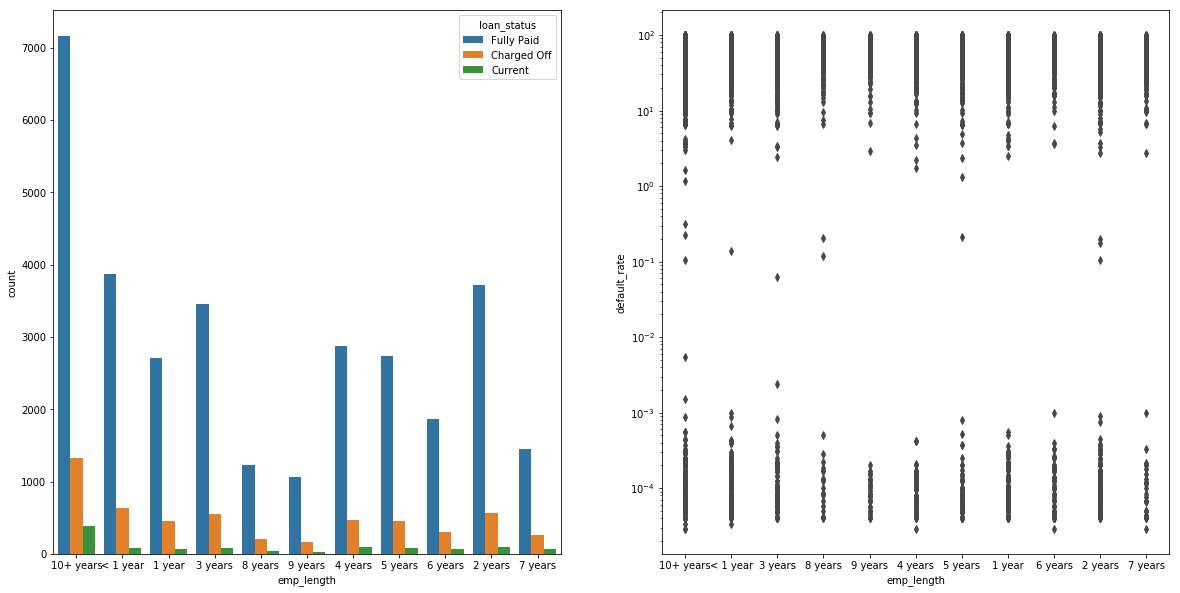

In [902]:
#Analysing different factors driving default rates - univariate, segmented univariate & bi-variate analysis
##1) - Employee length & its impact on default rate
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.countplot(x = "emp_length", hue = 'loan_status',data = loan_data_final)
plt.subplot(1,2,2)
sns.boxplot(x="emp_length", y ="default_rate", data = loan_data_default_analysis)
plt.yscale('log')
plt.show

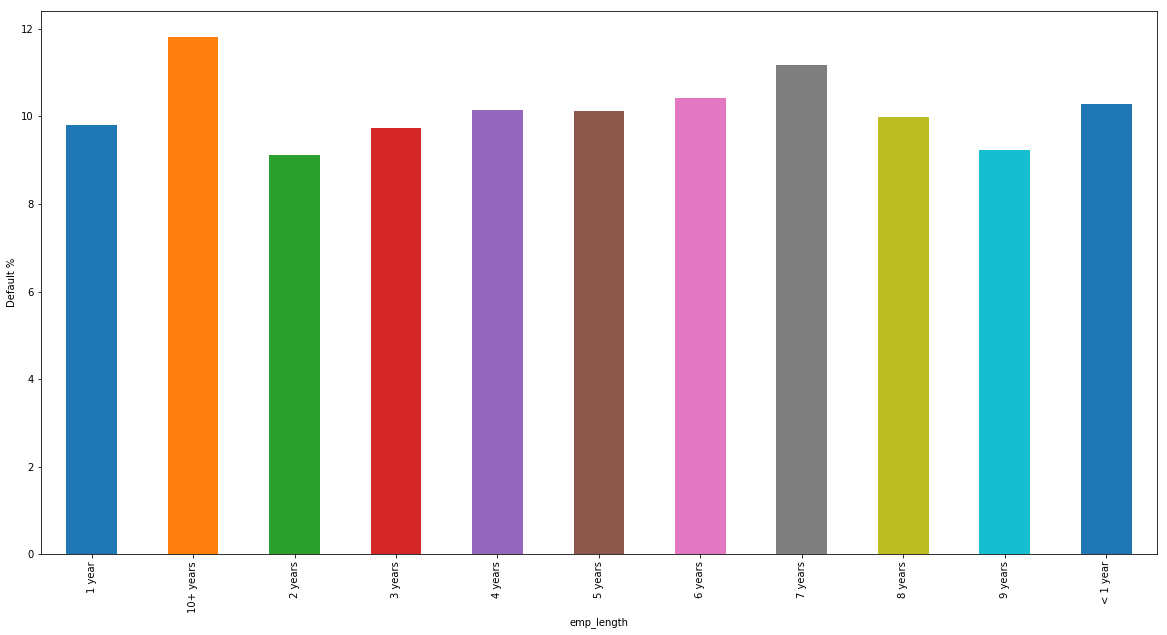

In [903]:
# Default % by employment length category
emp_length_subset = loan_data_default_analysis.groupby('emp_length')['default_amount'].aggregate('sum')/loan_data_default_analysis.groupby('emp_length')['funded_amnt'].aggregate('sum')*100
plt.figure(figsize = (20,10))
emp_length_subset.plot.bar()
plt.ylabel('Default %')
plt.show()

In [904]:
emp_length_subset

emp_length
1 year        9.792465
10+ years    11.821842
2 years       9.119261
3 years       9.735461
4 years      10.147385
5 years      10.115336
6 years      10.425389
7 years      11.169239
8 years       9.995506
9 years       9.241592
< 1 year     10.273414
dtype: float64

#### From Above, its clear that Employment length is not a critical factor in driving default rate

<function matplotlib.pyplot.show(*args, **kw)>

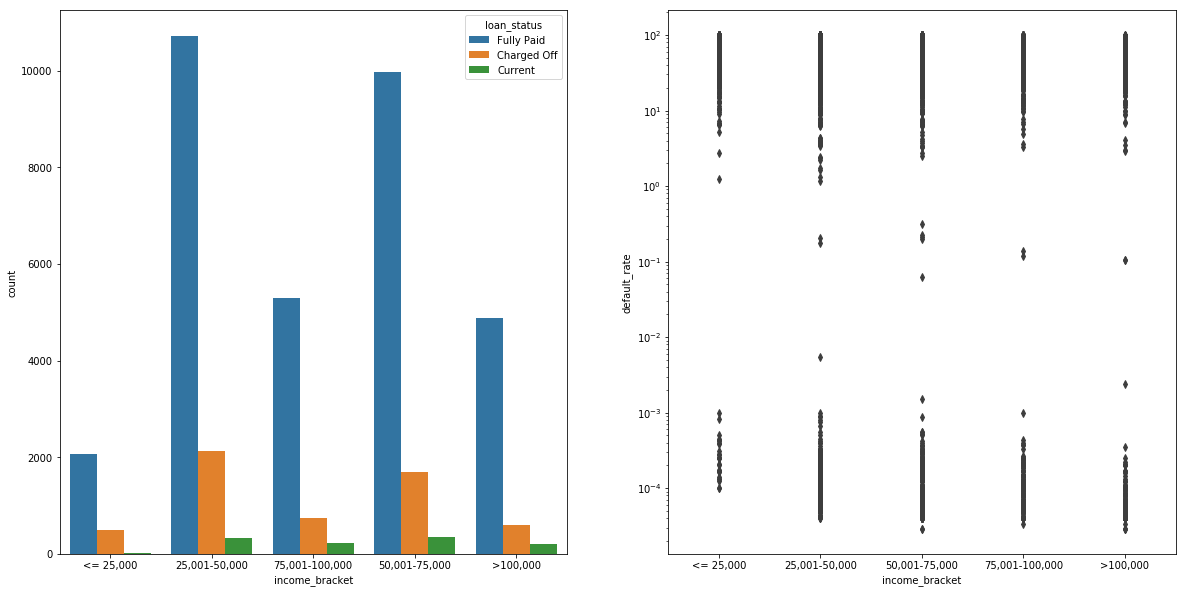

In [905]:
##2) - Income bracket
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.countplot(x = "income_bracket", hue = 'loan_status',data = loan_data_final)
plt.subplot(1,2,2)
sns.boxplot(x="income_bracket", y ="default_rate", data = loan_data_default_analysis)
plt.yscale('log')
plt.show

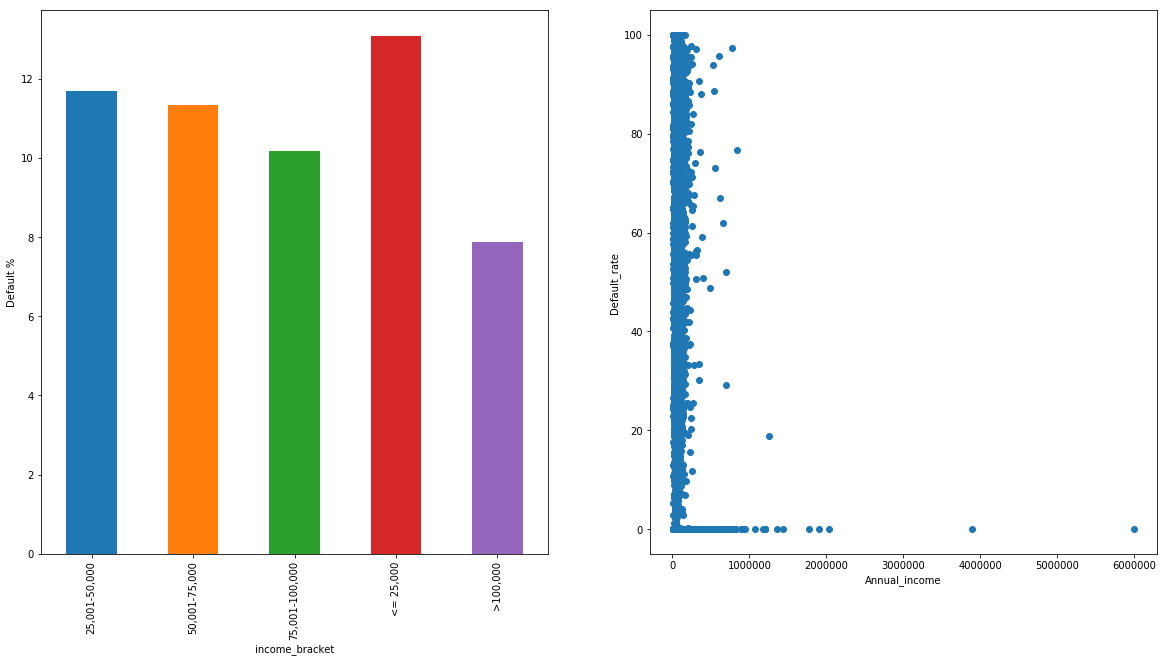

In [906]:
income_bracket_subset = loan_data_default_analysis.groupby('income_bracket')['default_amount'].aggregate('sum')/loan_data_default_analysis.groupby('income_bracket')['funded_amnt'].aggregate('sum')*100
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
income_bracket_subset.plot.bar()
plt.ylabel('Default %')
plt.subplot(1,2,2)
plt.scatter(loan_data_default_analysis['annual_inc'], loan_data_default_analysis['default_rate'])
plt.xlabel('Annual_income')
plt.ylabel('Default_rate')
plt.show()

In [907]:
income_bracket_subset

income_bracket
25,001-50,000     11.683239
50,001-75,000     11.336345
75,001-100,000    10.175210
<= 25,000         13.078044
>100,000           7.879511
dtype: float64

#### From the above its clear that Income Bracket is a critical factor - in < 25K and 25-50K bracket

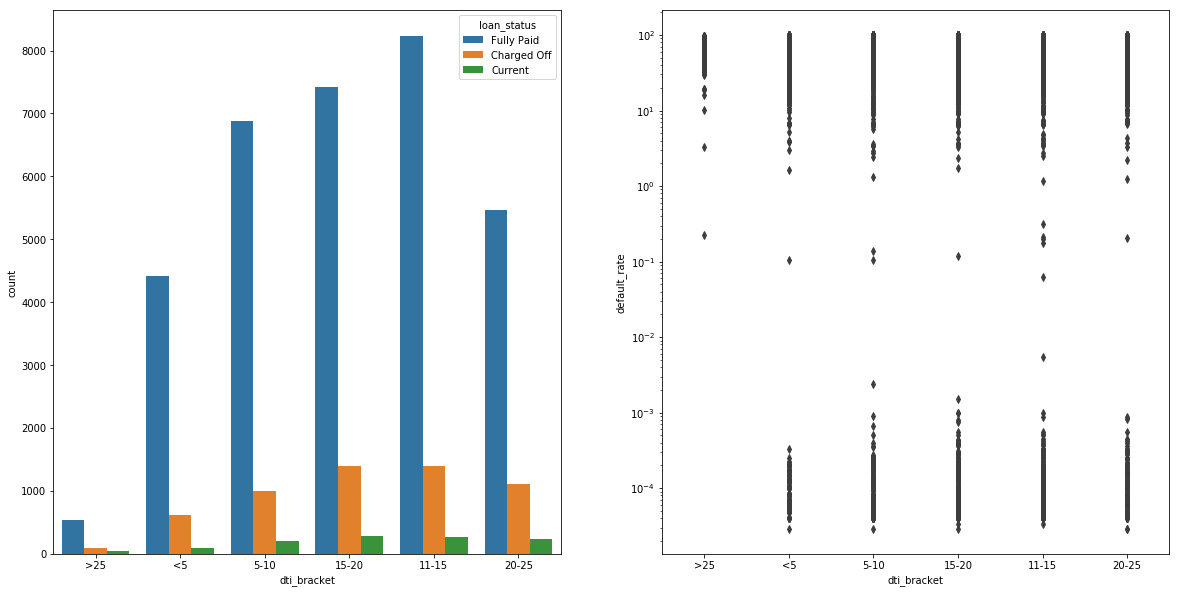

In [908]:
##3) - DTI (ability of the customer to repay the debt)
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.countplot(x = "dti_bracket", hue = 'loan_status',data = loan_data_final)
plt.subplot(1,2,2)
sns.boxplot(x="dti_bracket", y ="default_rate", data = loan_data_default_analysis)
plt.yscale('log')
plt.show()

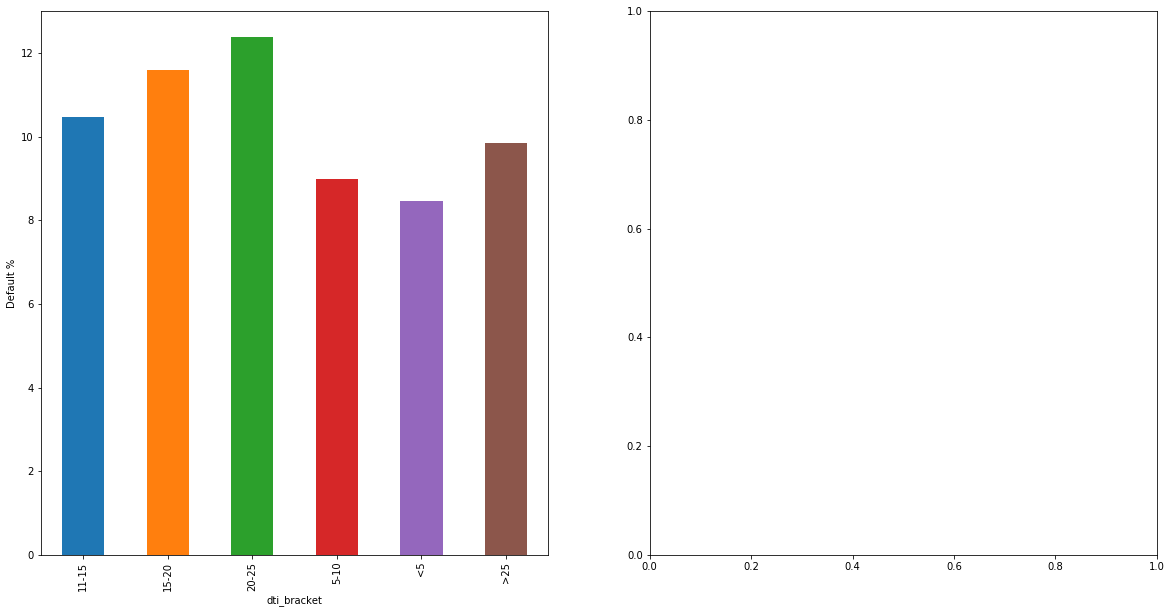

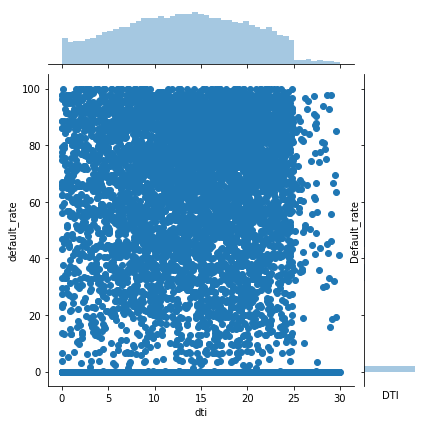

In [909]:
dti_bracket_subset = loan_data_default_analysis.groupby('dti_bracket')['default_amount'].aggregate('sum')/loan_data_default_analysis.groupby('dti_bracket')['funded_amnt'].aggregate('sum')*100
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
dti_bracket_subset.plot.bar()
plt.ylabel('Default %')
plt.subplot(1,2,2)
sns.jointplot(loan_data_default_analysis['dti'], loan_data_default_analysis['default_rate'])
plt.xlabel('DTI')
plt.ylabel('Default_rate')
plt.show()

In [937]:
dti_bracket_subset

dti_bracket
11-15    10.482437
15-20    11.602036
20-25    12.387049
5-10      8.987543
<5        8.456422
>25       9.860221
dtype: float64

#### From the above its clear that DTI is a critical factor in default rate

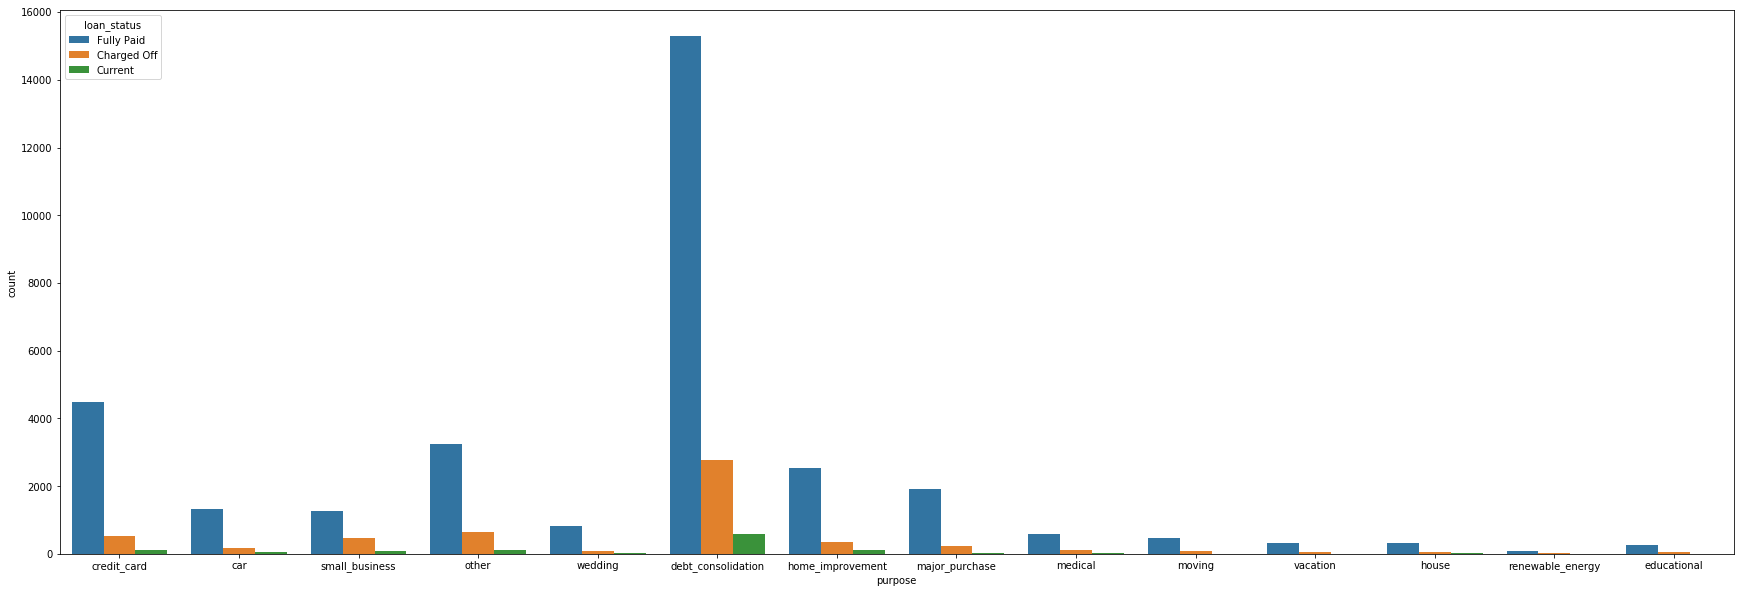

In [911]:
#4) - Loan purpose
plt.figure(figsize = (30,10))
sns.countplot(x = "purpose", hue = 'loan_status',data = loan_data_final)
plt.show()

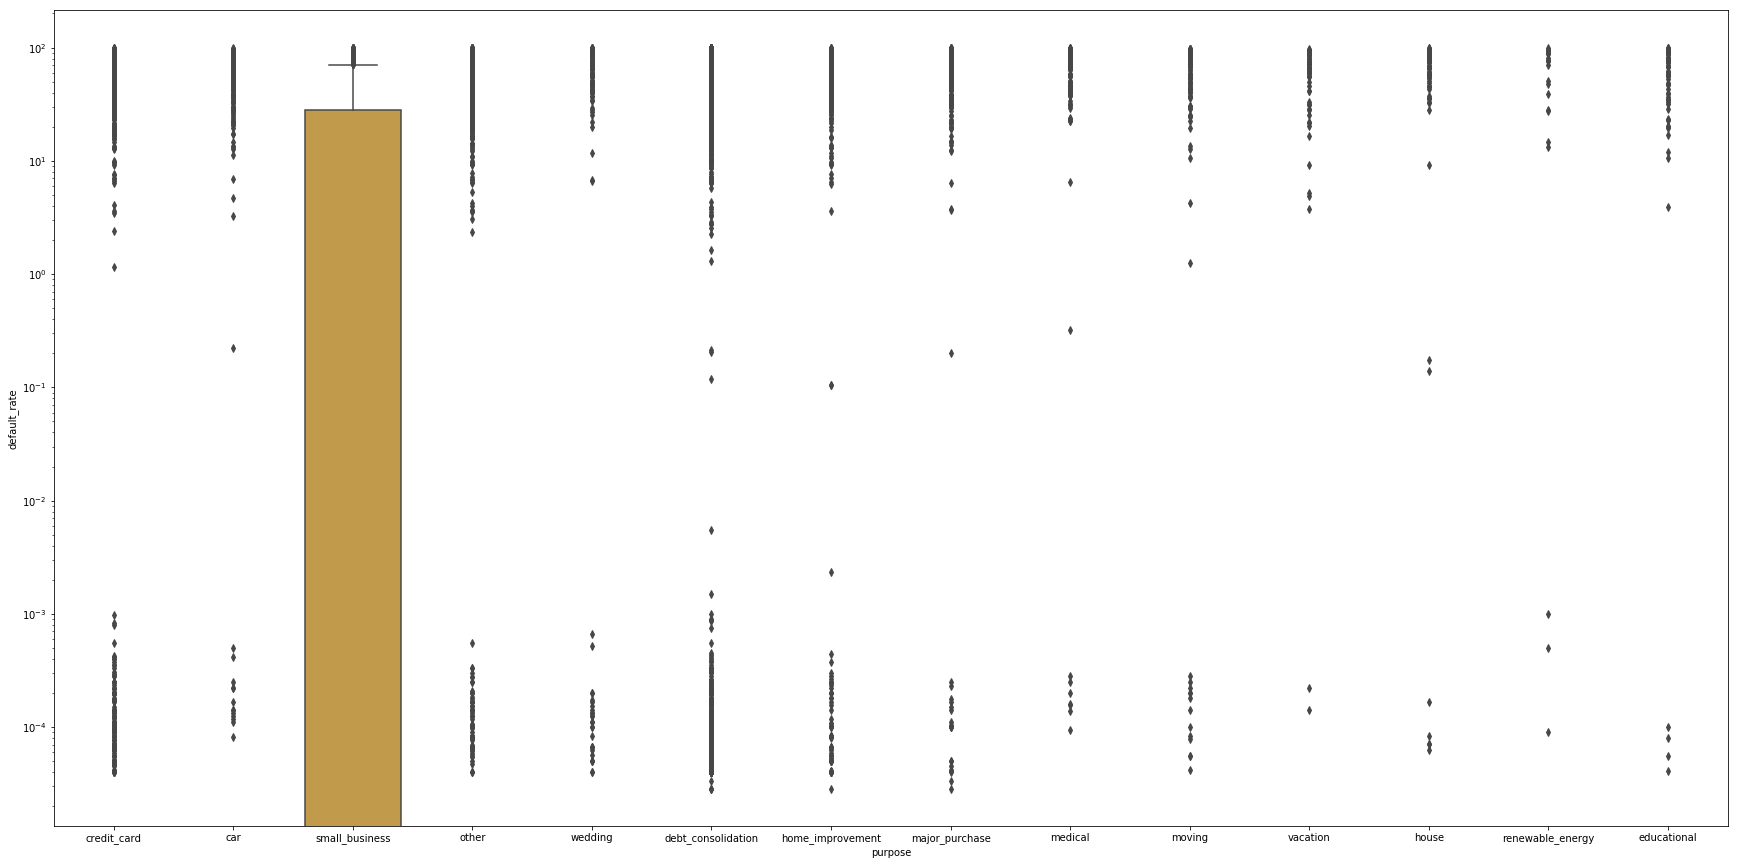

In [912]:
plt.figure(figsize = (30,15))
sns.boxplot(x="purpose", y ="default_rate", data = loan_data_default_analysis)
plt.yscale('log')
plt.show()

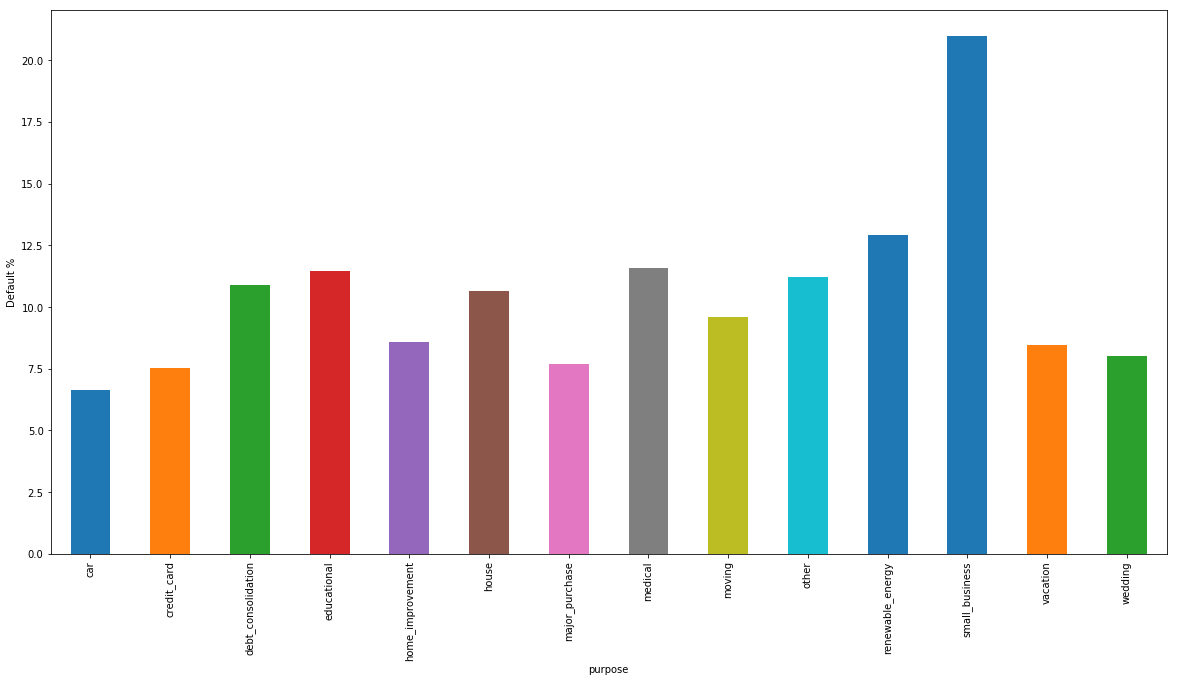

In [939]:
purpose_subset = loan_data_default_analysis.groupby('purpose')['default_amount'].aggregate('sum')/loan_data_default_analysis.groupby('purpose')['funded_amnt'].aggregate('sum')*100
plt.figure(figsize = (20,10))
purpose_subset.plot.bar()
plt.ylabel('Default %')
plt.show()

In [940]:
purpose_subset

purpose
car                    6.633097
credit_card            7.526063
debt_consolidation    10.911085
educational           11.444891
home_improvement       8.576689
house                 10.634552
major_purchase         7.677171
medical               11.585704
moving                 9.586396
other                 11.230952
renewable_energy      12.917415
small_business        20.979497
vacation               8.454970
wedding                8.016526
dtype: float64

#### Loan purpose is a critical factor - especially lending to Small business

<function matplotlib.pyplot.show(*args, **kw)>

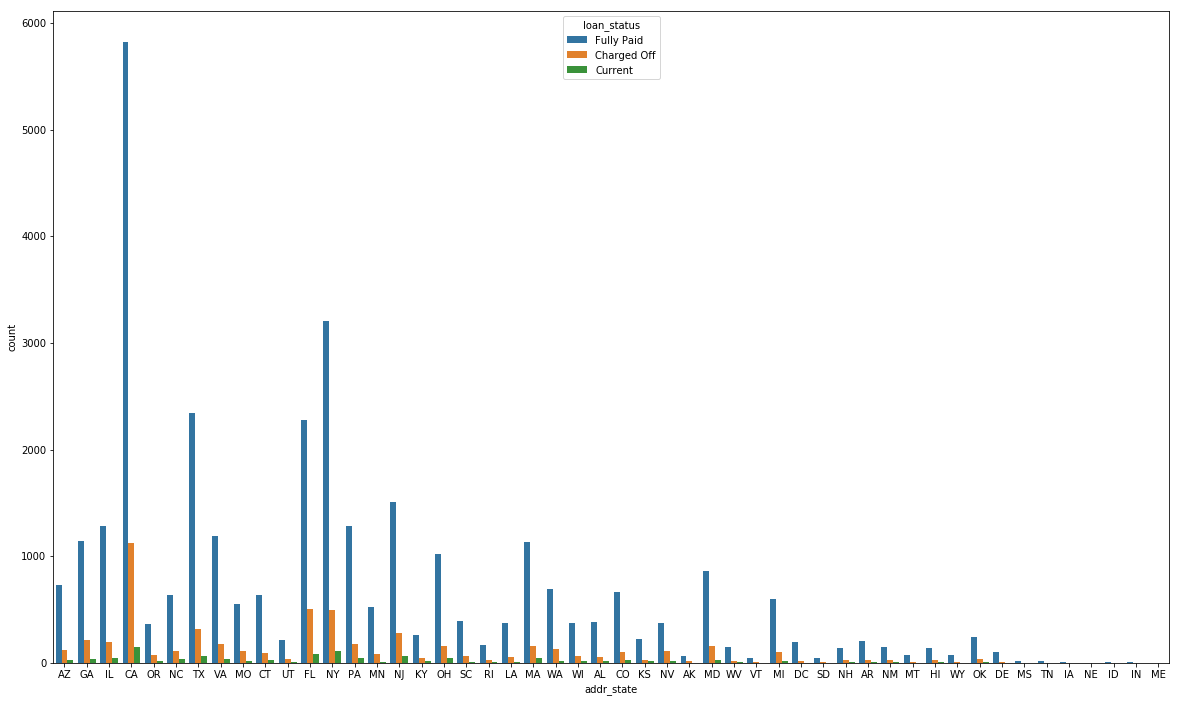

In [915]:
# 5) Location of customer - State
plt.figure(figsize = (20,12))
sns.countplot(x = "addr_state", hue = 'loan_status',data = loan_data_final)
plt.show

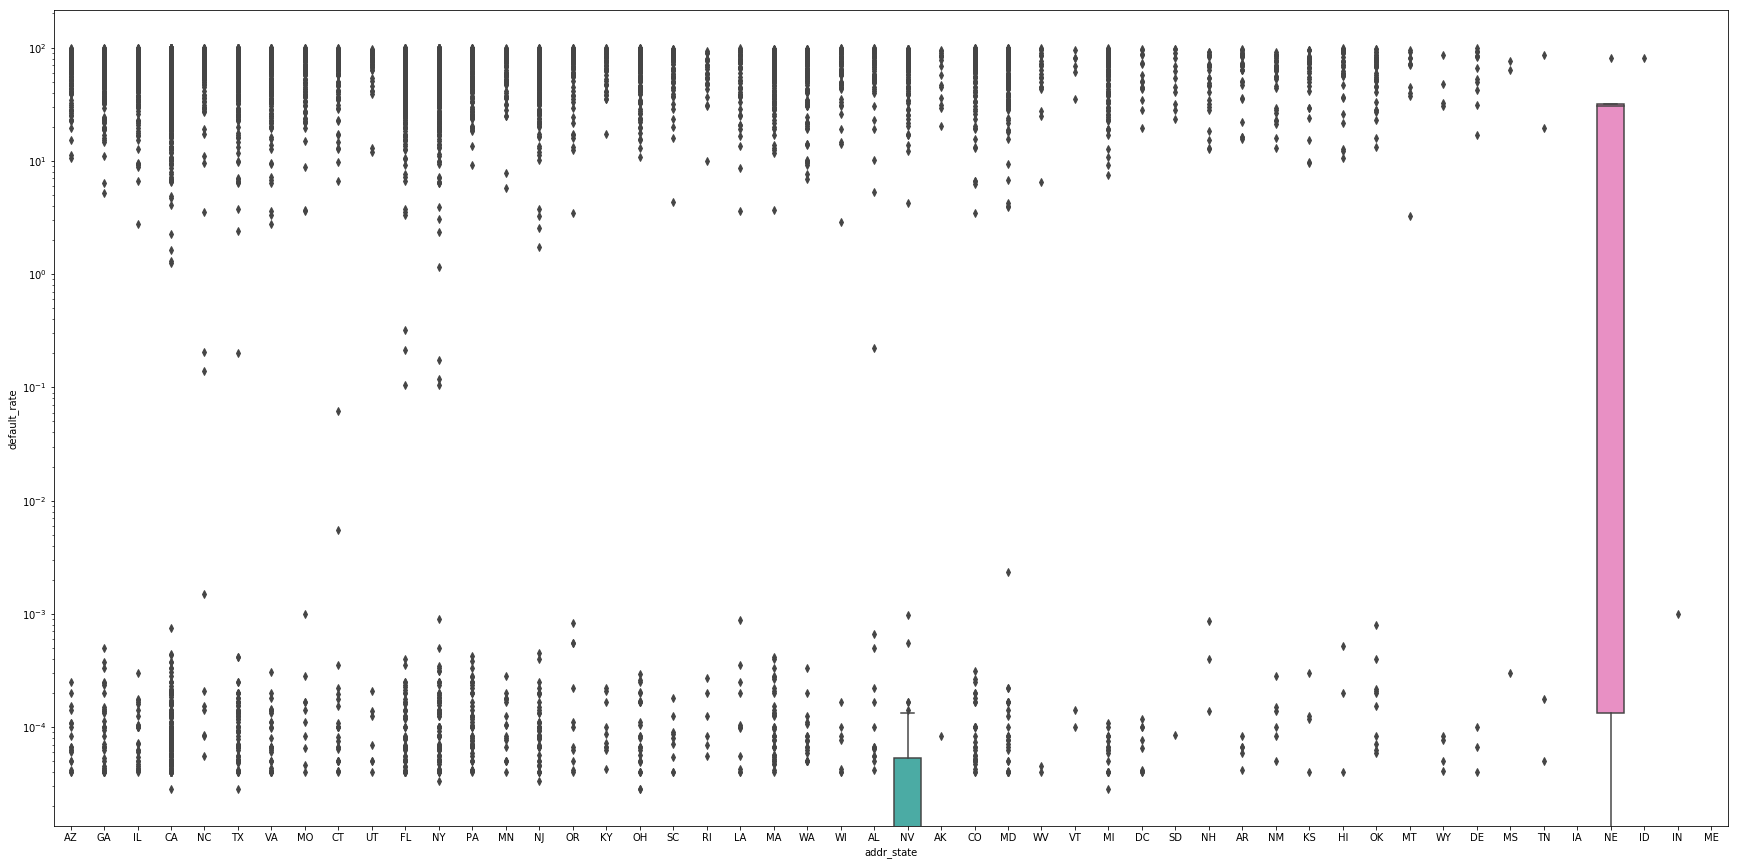

In [916]:
plt.figure(figsize = (30,15))
sns.boxplot(x="addr_state", y ="default_rate", data = loan_data_default_analysis)
plt.yscale('log')
plt.show()

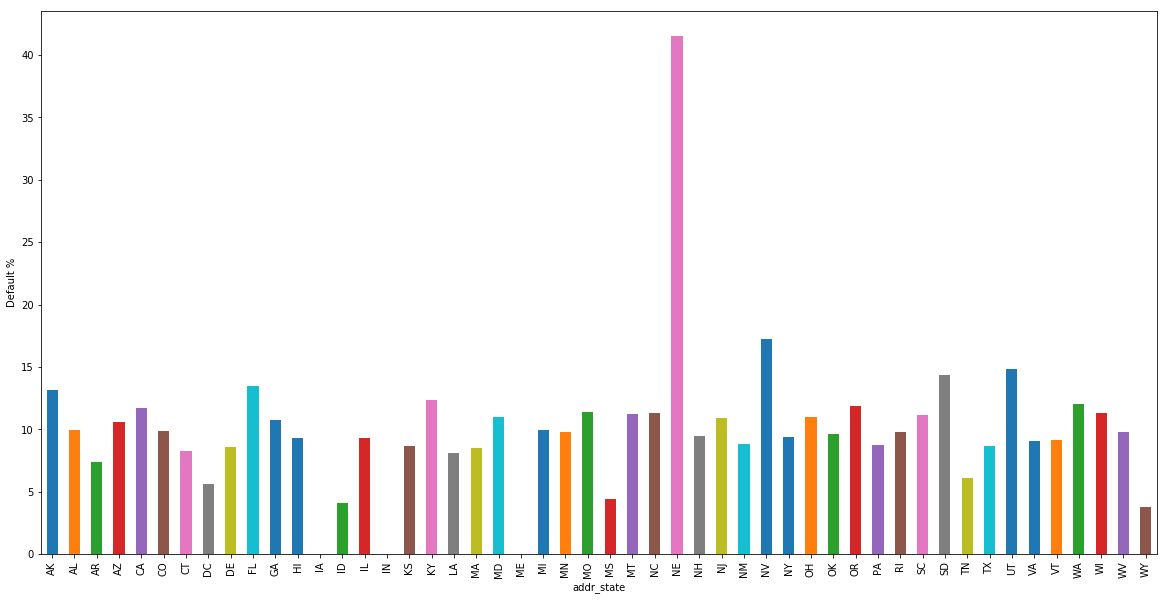

In [941]:
location_subset = loan_data_default_analysis.groupby('addr_state')['default_amount'].aggregate('sum')/loan_data_default_analysis.groupby('addr_state')['funded_amnt'].aggregate('sum')*100
plt.figure(figsize = (20,10))
location_subset.plot.bar()
plt.ylabel('Default %')
plt.show()

In [918]:
location_subset

addr_state
AK    13.185950
AL     9.983857
AR     7.357460
AZ    10.582442
CA    11.728512
CO     9.836713
CT     8.286558
DC     5.625323
DE     8.562944
FL    13.451911
GA    10.751302
HI     9.297043
IA     0.000000
ID     4.072937
IL     9.299323
IN     0.000013
KS     8.641957
KY    12.325967
LA     8.132083
MA     8.534093
MD    10.956345
ME     0.000000
MI     9.982829
MN     9.806938
MO    11.382679
MS     4.394224
MT    11.242707
NC    11.284729
NE    41.485931
NH     9.503911
NJ    10.914756
NM     8.816526
NV    17.239232
NY     9.414311
OH    10.993241
OK     9.642106
OR    11.836312
PA     8.775938
RI     9.820664
SC    11.125828
SD    14.319294
TN     6.104476
TX     8.685709
UT    14.800194
VA     9.043263
VT     9.179528
WA    12.050915
WI    11.288153
WV     9.787146
WY     3.756429
dtype: float64

In [948]:
loan_default_NE =loan_data_default_analysis[(loan_data_default_analysis['addr_state']== 'NE')]
loan_default_NE['default_amount'].sum()

13151.039999999999

#### While NE state has a high default rate, but since the total default is very small, it can be ignored

<function matplotlib.pyplot.show(*args, **kw)>

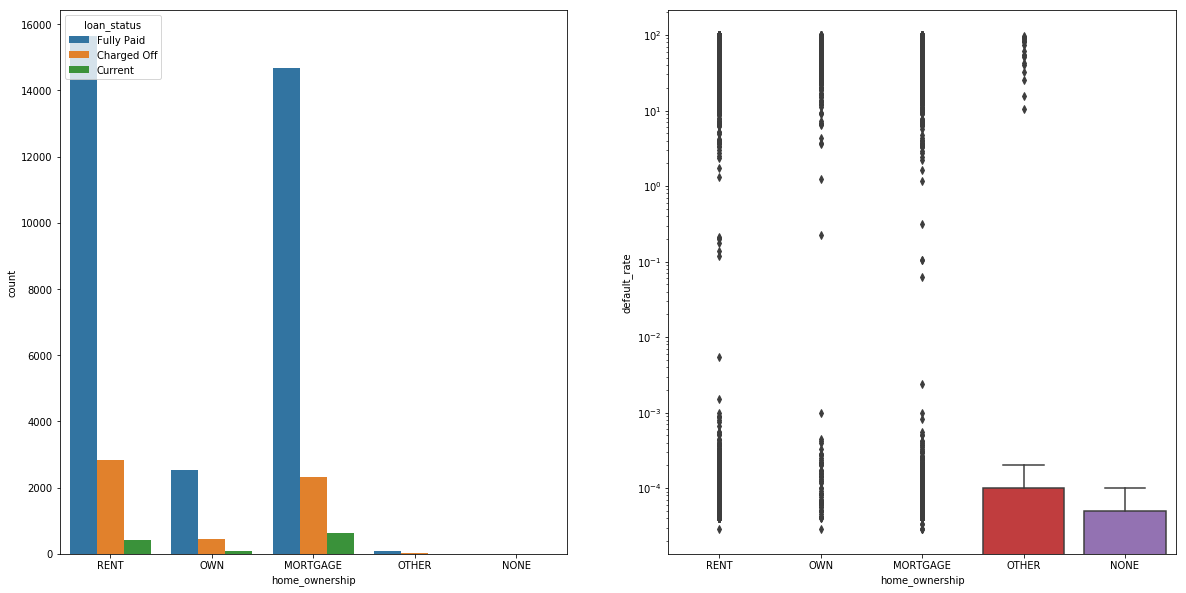

In [919]:
# 6) Ownership of home
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.countplot(x = "home_ownership", hue = 'loan_status',data = loan_data_final)
plt.subplot(1,2,2)
sns.boxplot(x="home_ownership", y ="default_rate", data = loan_data_default_analysis)
plt.yscale('log')
plt.show

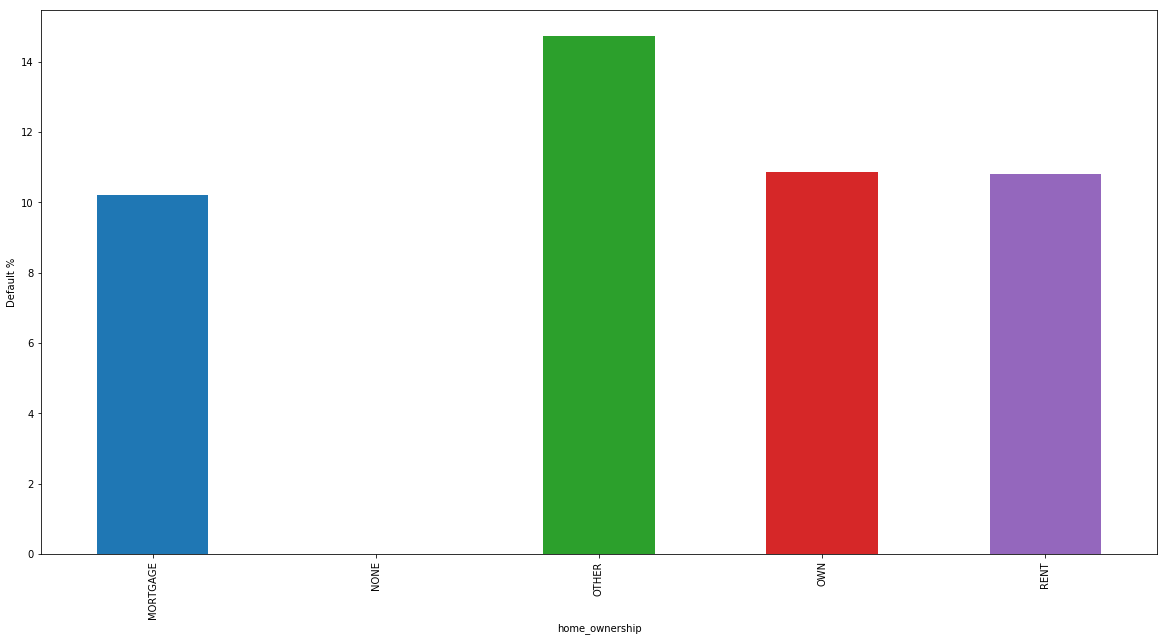

In [949]:
ownership_subset = loan_data_default_analysis.groupby('home_ownership')['default_amount'].aggregate('sum')/loan_data_default_analysis.groupby('home_ownership')['funded_amnt'].aggregate('sum')*100
plt.figure(figsize = (20,10))
ownership_subset.plot.bar()
plt.ylabel('Default %')
plt.show()

In [950]:
ownership_subset

home_ownership
MORTGAGE    10.216091
NONE         0.000060
OTHER       14.722736
OWN         10.873640
RENT        10.815872
dtype: float64

In [951]:
loan_default_home =loan_data_default_analysis[(loan_data_default_analysis['home_ownership']== 'OTHER')]
loan_default_home['default_amount'].sum()

146428.65

#### While Other has a high default rate, but since the total default is very small, it can be ignored

<function matplotlib.pyplot.show(*args, **kw)>

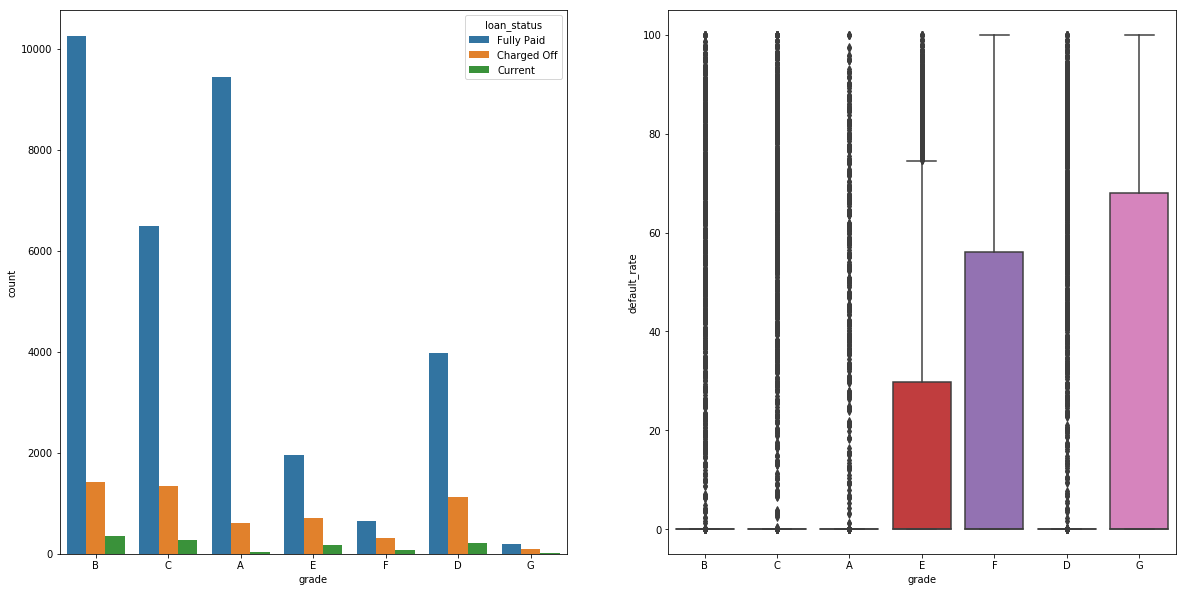

In [922]:
#7) Loan grade
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.countplot(x = "grade", hue = 'loan_status',data = loan_data_final)
plt.subplot(1,2,2)
sns.boxplot(x ='grade', y= 'default_rate', data = loan_data_default_analysis)
plt.show

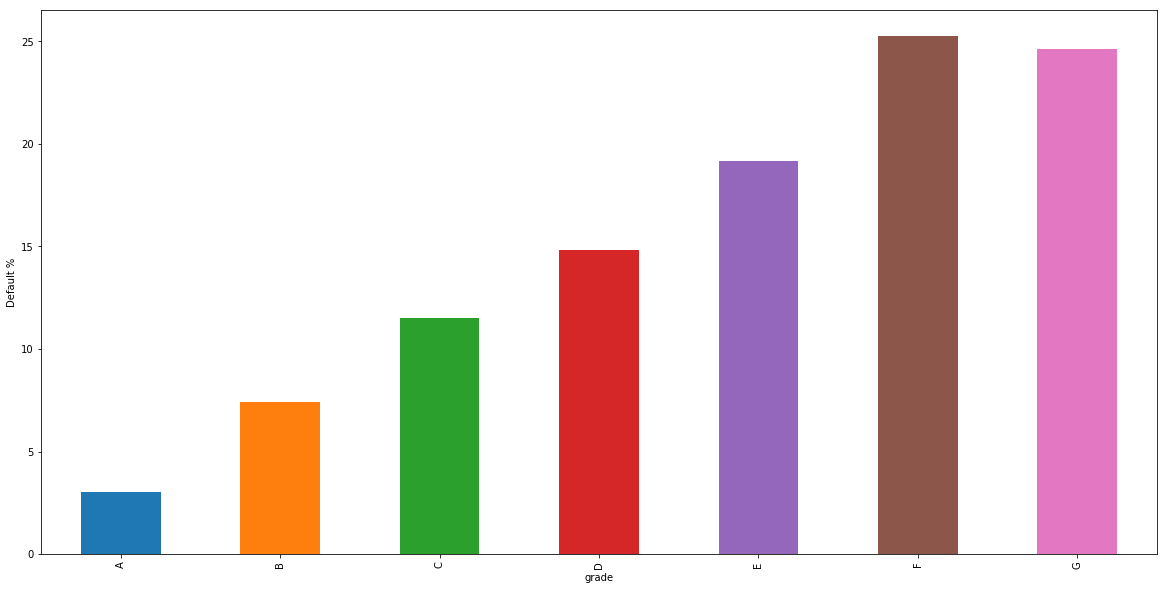

In [954]:
grade_subset = loan_data_default_analysis.groupby('grade')['default_amount'].aggregate('sum')/loan_data_default_analysis.groupby('grade')['funded_amnt'].aggregate('sum')*100
plt.figure(figsize = (20,10))
grade_subset.plot.bar()
plt.ylabel('Default %')
plt.show()

In [924]:
grade_subset

grade
A     3.030128
B     7.408426
C    11.502043
D    14.821948
E    19.157140
F    25.246080
G    24.619342
dtype: float64

#### Loan grade is a critical factor esp. D & above

<function matplotlib.pyplot.show(*args, **kw)>

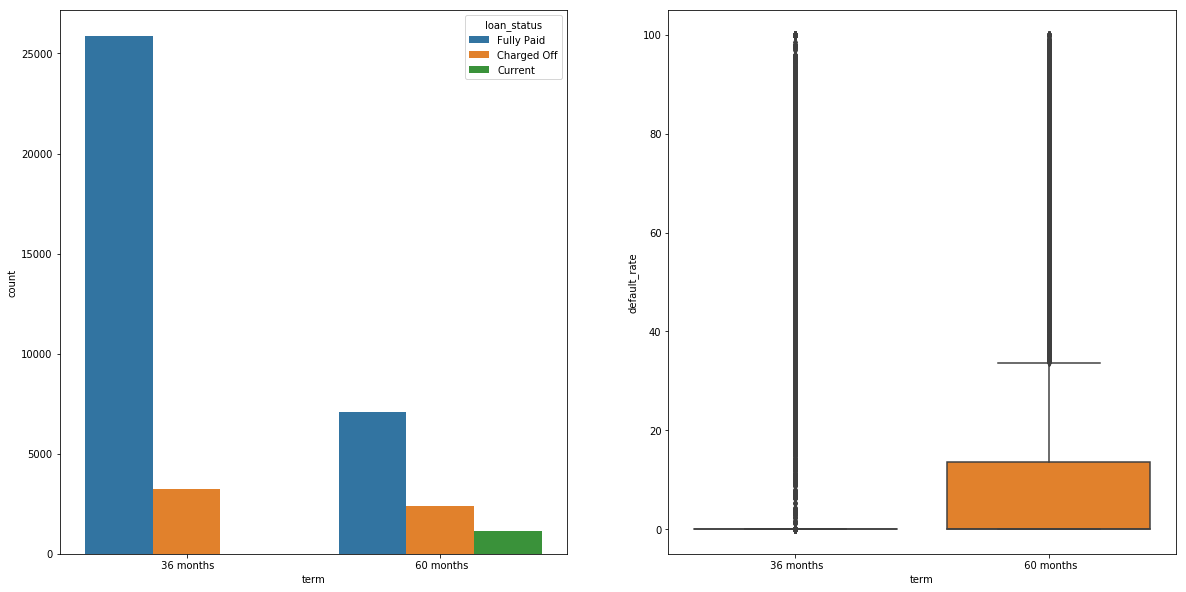

In [925]:
#8) Loan Tenure
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.countplot(x = "term", hue = 'loan_status',data = loan_data_final)
plt.subplot(1,2,2)
sns.boxplot(x ='term', y='default_rate', data = loan_data_default_analysis)
plt.show

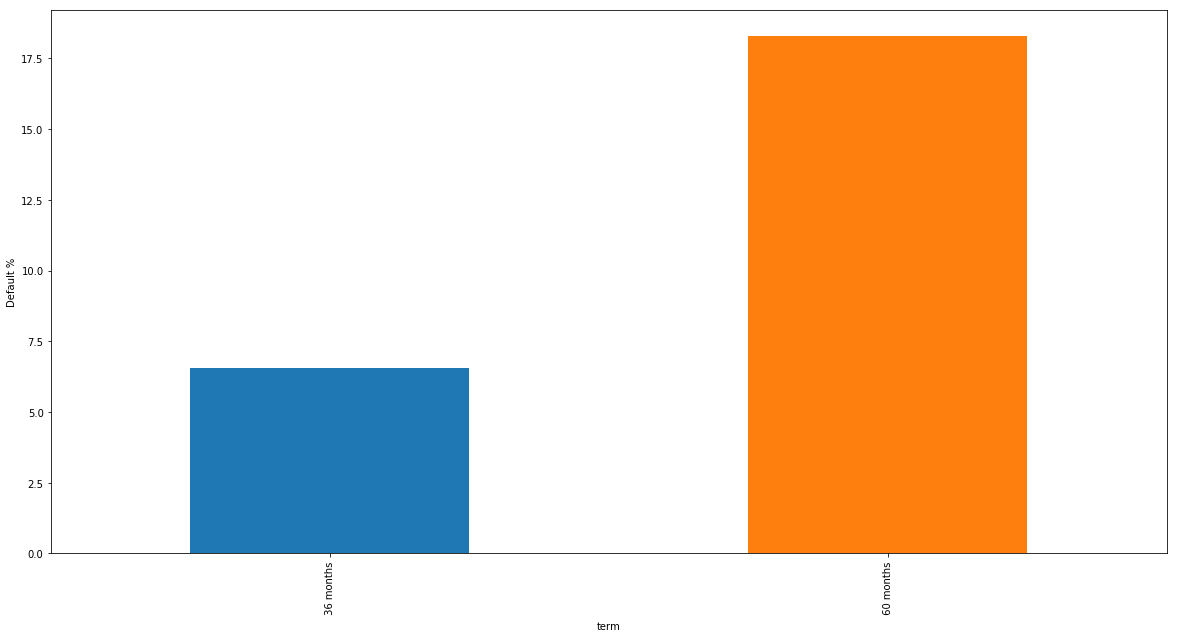

In [955]:
tenure_subset = loan_data_default_analysis.groupby('term')['default_amount'].aggregate('sum')/loan_data_default_analysis.groupby('term')['funded_amnt'].aggregate('sum')*100
plt.figure(figsize = (20,10))
tenure_subset.plot.bar()
plt.ylabel('Default %')
plt.show()

In [927]:
tenure_subset

term
 36 months     6.567688
 60 months    18.304476
dtype: float64

#### Loan Tenure is a Critical Factor

<function matplotlib.pyplot.show(*args, **kw)>

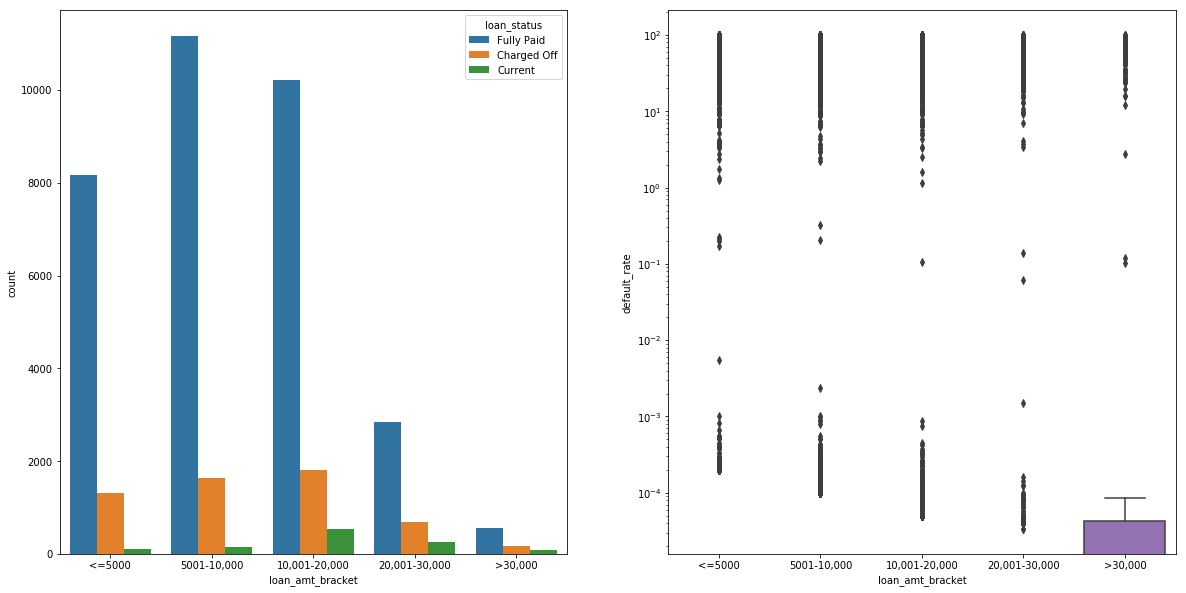

In [928]:
#9) Loan Amount
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.countplot(x = "loan_amt_bracket", hue = 'loan_status',data = loan_data_final)
plt.subplot(1,2,2)
sns.boxplot(x ='loan_amt_bracket', y='default_rate', data = loan_data_default_analysis)
plt.yscale('log')
plt.show

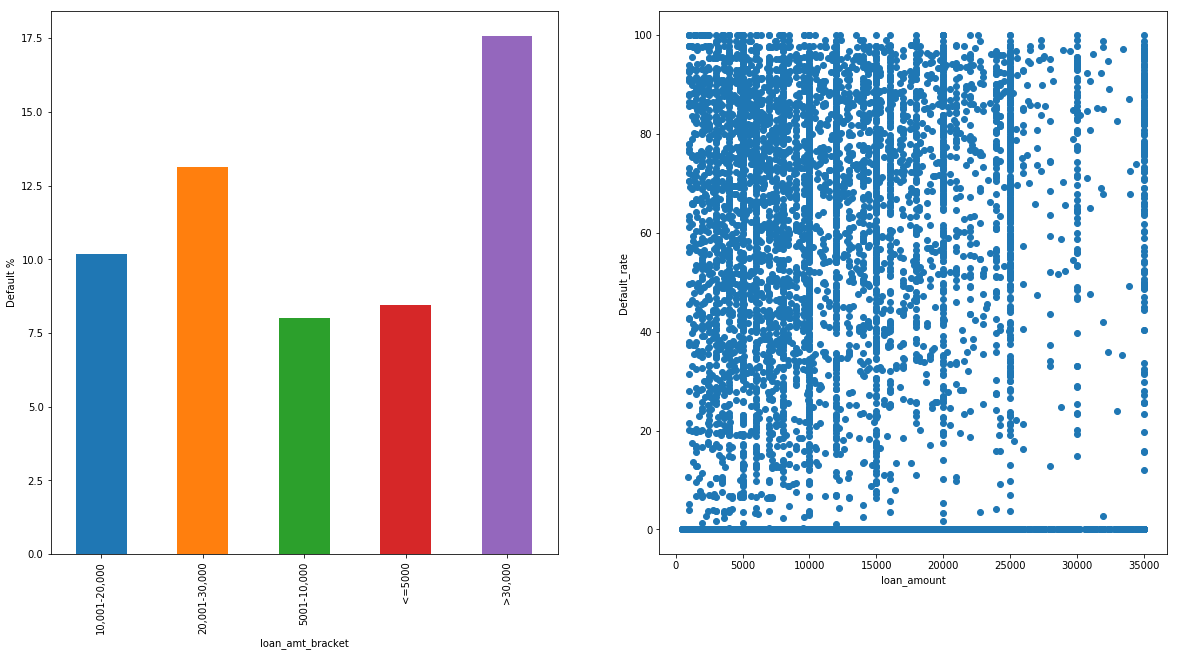

In [956]:
loan_amt_subset = loan_data_default_analysis.groupby('loan_amt_bracket')['default_amount'].aggregate('sum')/loan_data_default_analysis.groupby('loan_amt_bracket')['funded_amnt'].aggregate('sum')*100
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
loan_amt_subset.plot.bar()
plt.ylabel('Default %')
plt.subplot(1,2,2)
plt.scatter(loan_data_default_analysis['loan_amnt'], loan_data_default_analysis['default_rate'])
plt.xlabel('loan_amount')
plt.ylabel('Default_rate')
plt.show()

In [930]:
loan_amt_subset

loan_amt_bracket
10,001-20,000    10.170128
20,001-30,000    13.130073
5001-10,000       8.005064
<=5000            8.447818
>30,000          17.564339
dtype: float64

#### Loan amount is a Critical factor esp. in the >20K amount

<function matplotlib.pyplot.show(*args, **kw)>

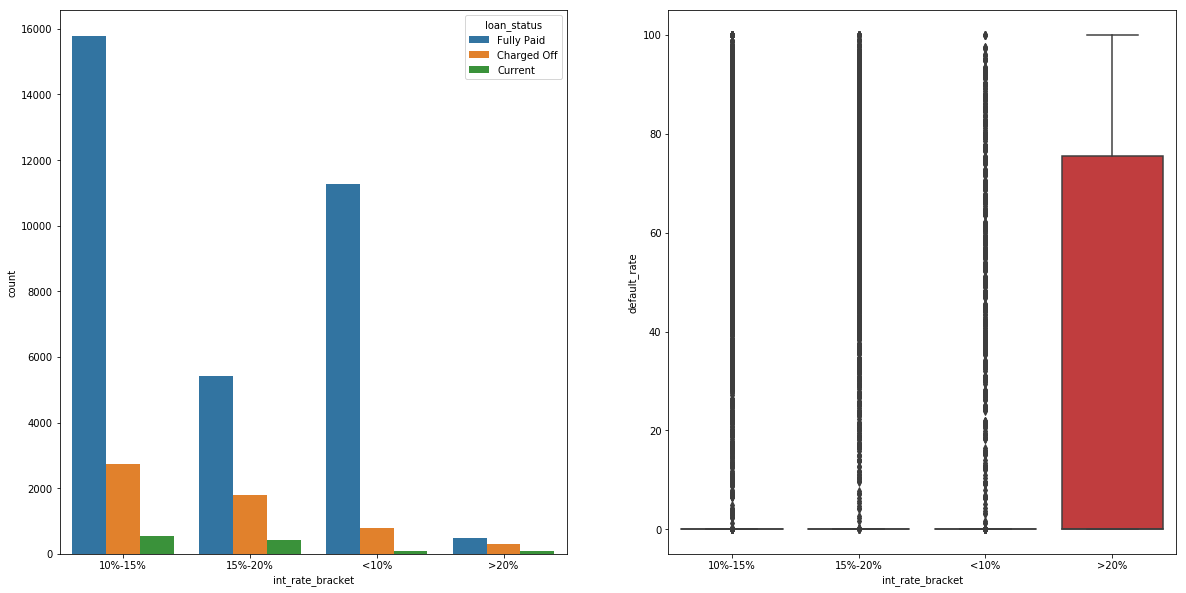

In [931]:
#10) Interest rate charged
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.countplot(x = "int_rate_bracket", hue = 'loan_status',data = loan_data_final)
plt.subplot(1,2,2)
sns.boxplot(x ='int_rate_bracket', y='default_rate', data = loan_data_default_analysis)
plt.show

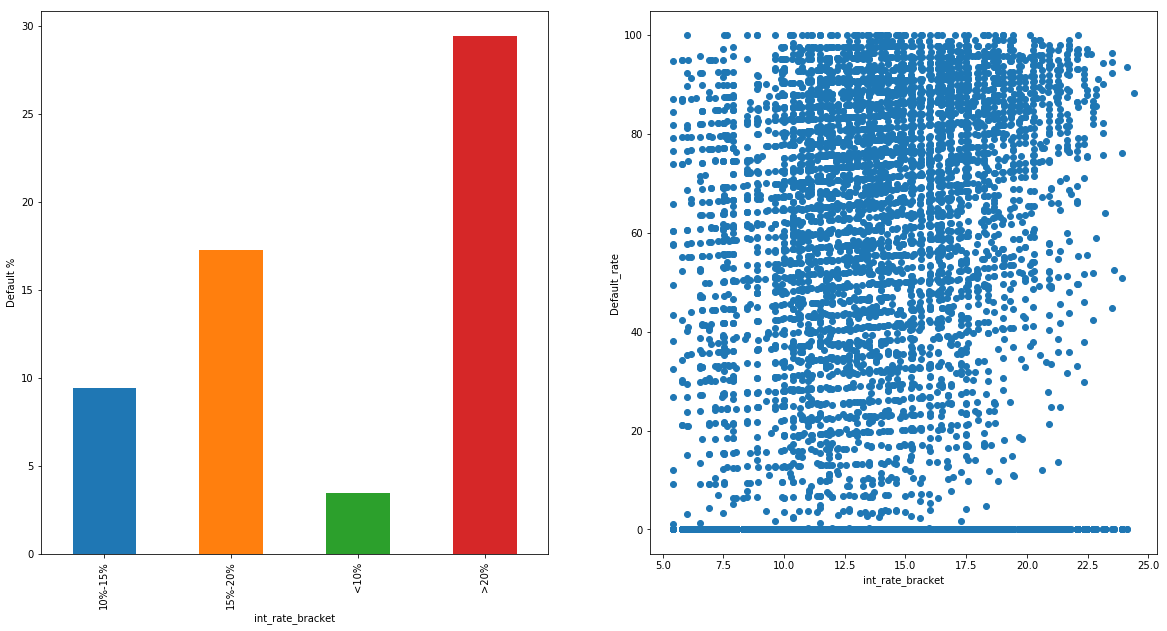

In [957]:
int_rate_subset = loan_data_default_analysis.groupby('int_rate_bracket')['default_amount'].aggregate('sum')/loan_data_default_analysis.groupby('int_rate_bracket')['funded_amnt'].aggregate('sum')*100
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
int_rate_subset.plot.bar()
plt.ylabel('Default %')
plt.subplot(1,2,2)
plt.scatter(loan_data_default_analysis['int_rate'], loan_data_default_analysis['default_rate'])
plt.xlabel('int_rate_bracket')
plt.ylabel('Default_rate')
plt.show()


In [933]:
int_rate_subset

int_rate_bracket
10%-15%     9.446578
15%-20%    17.291001
<10%        3.459228
>20%       29.390747
dtype: float64

#### Interest Rate is a Critical factor esp. in the 15-20% category

<function matplotlib.pyplot.show(*args, **kw)>

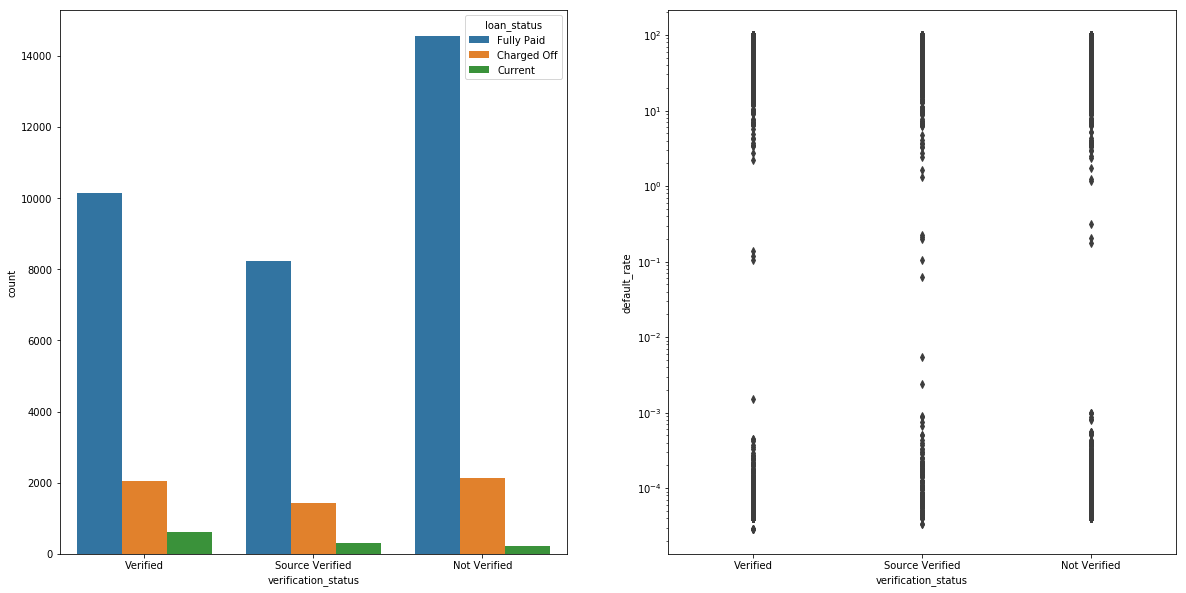

In [934]:
#10) Verification status of loan
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.countplot(x = "verification_status", hue = 'loan_status',data = loan_data_final)
plt.subplot(1,2,2)
sns.boxplot(x ='verification_status', y='default_rate', data = loan_data_default_analysis)
plt.yscale('log')
plt.show

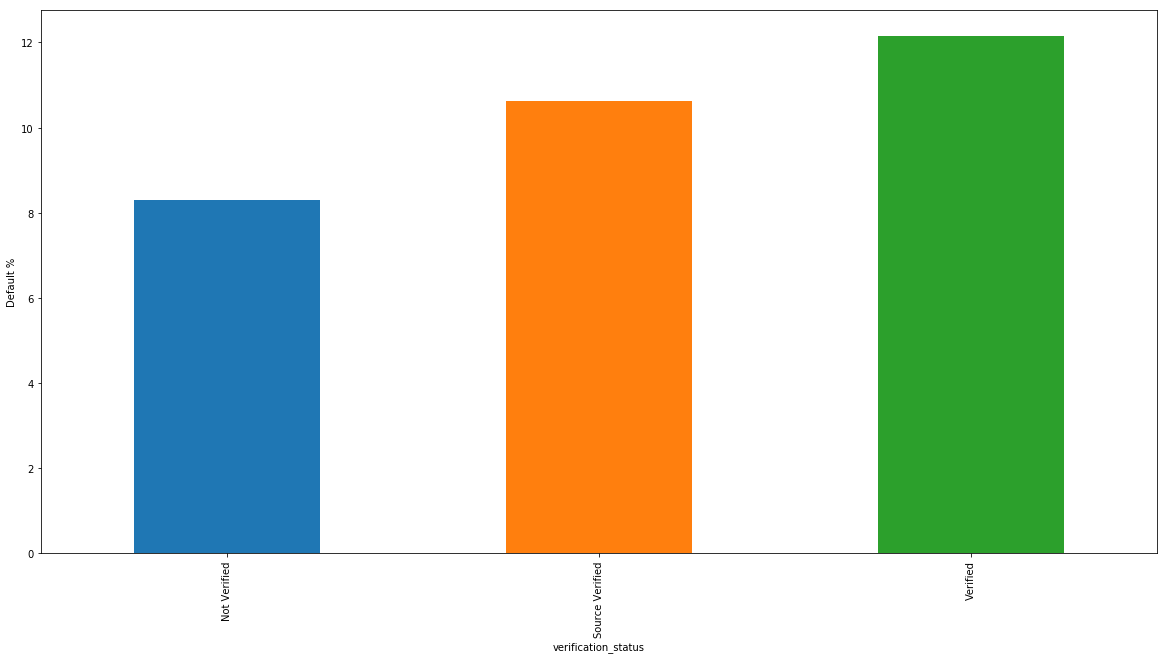

In [958]:
verification_status_subset = loan_data_default_analysis.groupby('verification_status')['default_amount'].aggregate('sum')/loan_data_default_analysis.groupby('verification_status')['funded_amnt'].aggregate('sum')*100
plt.figure(figsize = (20,10))
verification_status_subset.plot.bar()
plt.ylabel('Default %')
plt.show()

In [959]:
verification_status_subset

verification_status
Not Verified        8.304616
Source Verified    10.617862
Verified           12.158734
dtype: float64

#### Verification Status is not a Critical factor